<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_H_22_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #10- Denysse Sevilla**


## Section 22.4: Numerical Error and Instability

**Accuracy**:  a scheme's ability to get close to the exact solution

**Stability**: an integration's scheme's ability to keep the error from increasing as it integrates forward in time
* Stable: Error does not grow
* Unstable: Error grows

\
Ex: To illustrate issues of stability, use Euler Explicit, Euler Implicit, and Trapezoid Formulas to solve the pendulum equation over the time interval $[0,6]$ in increments of 0.05 and for an initial solution:

$S_0$ = \begin{bmatrix}
                 1 \\
                 0 \\
                 \end{bmatrix}.

For the model parameters using $ \sqrt{g/l} =4$. Plot the approximate solution on a single graph.



In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

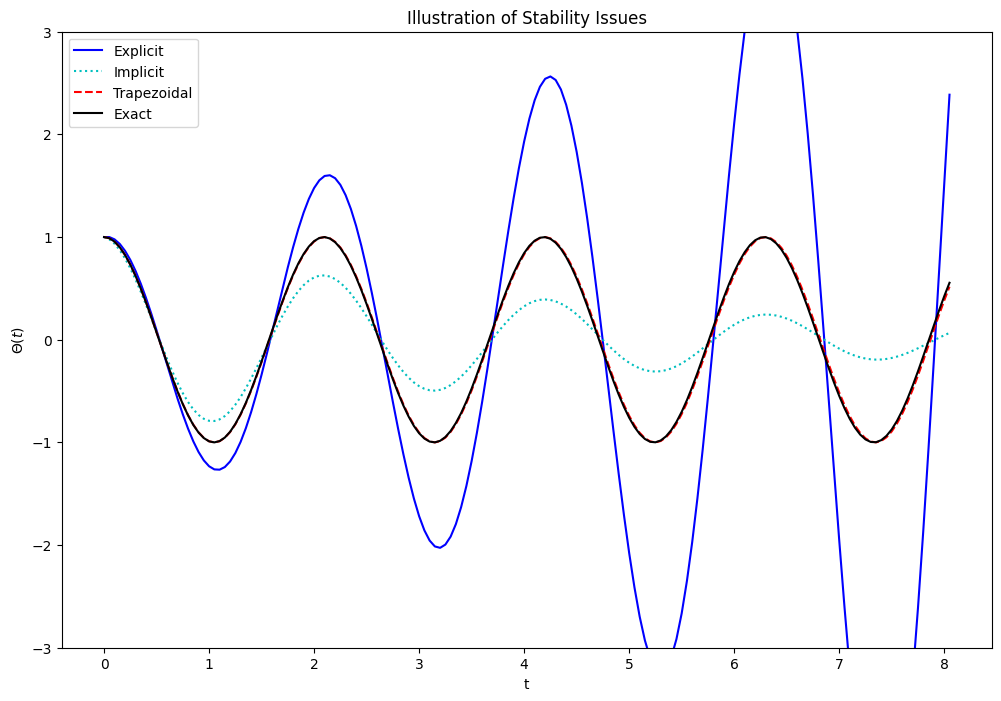

In [23]:
# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 8.1, h)
# oscillation freq. of pendulum
w = 3
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'c:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.title('Illustration of Stability Issues')
plt.show()

The figure shows:
* Exact solution: cosine wave
* Explicit Euler: unstable
* Implicit Euler: decays exponentially
* Trapezoid Method: very close to the solution, with a minor phase shift as time increases

## Section 22.5: Predictor-Corrector Methods

**Predictor-corrector methods**: algorithms that improve the approximation accuracy of non-predictor-corrector methods.
* Calculates a rough approximation of the function at different locations (prediction)
  * The predictor is an explicit formula that estimates the solution at $t_{j+1}$
* Uses a weighted average of the results to update the state (corrections)
  * The corrector is an implicit formula that calculates a more accurate solution $S(t_{j+1})$


## Section 22.6: Python ODE Solvers

The most commonly used function in *scipy* used to solve initial value problems is *scipy.integrate.solve_ivp*.

\
How to use the solver to solve differential equations:
* *solve_ipv(fun, t_span, s0, method = 'RK45', t_eval=None)*
  * *fun* : the function at the right hand side of the differential equation
  * *t_span* : the interval of integration $(t0, tf)$
  * *s0* : the initial state
  * *'RK45'*,: denotes the explicit Runge-Kutta method of order 5(4)
  * *t_eval*,: denotes the times used to store the computed solution
  * *t_span* : where the computed solutions are sorted and stored

\
Ex: Consider the ODE $ \frac{dS(t)}{dt} = sin(t)$ for an initial value $S_0 =0$. The exact solution to this problem is $S(t) = -cos(t)$. Use *solve_ivp* to approximate the solution to this initial value problem over the interval $[0,2π]$. Plot the approximate solution versus the exact solution and the relative error over time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

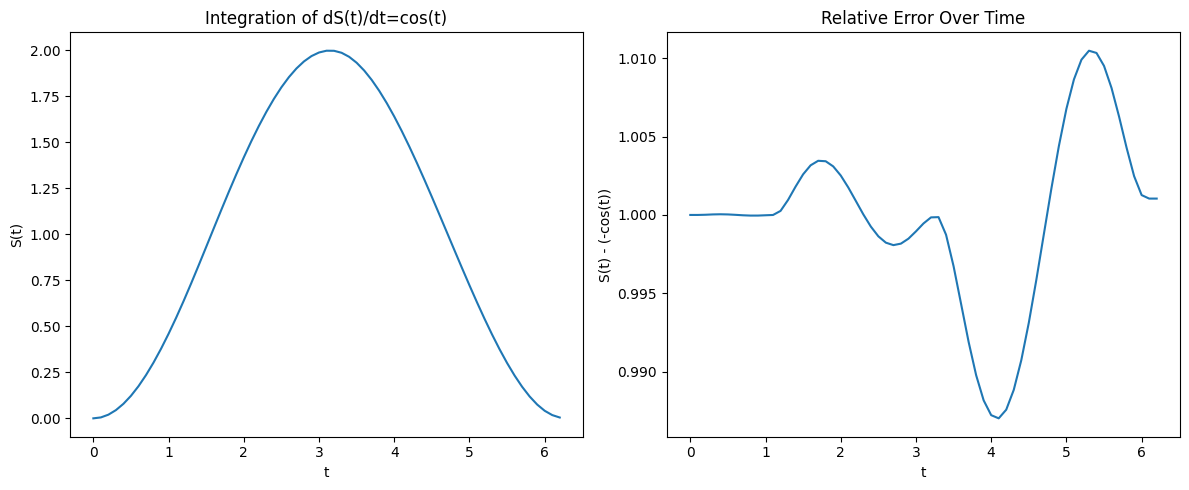

In [30]:
F = lambda t, s: np.sin(t)

t_eval = np.arange(0, 2*np.pi, 0.1)
sol = solve_ivp(F, [0, 2*np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Integration of dS(t)/dt=cos(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - (-np.cos(sol.t)))
plt.xlabel('t')
plt.ylabel('S(t) - (-cos(t))')
plt.title('Relative Error Over Time')
plt.tight_layout()
plt.show()

It can be seen that the difference between the approximate and exact solution to this ODE is small.

\
The arguments *rtol* and *atol* can be used to control the relative and absolute tolerances. The solver keeps the local error approximations less that $atol+rtol*abs(S)$.

Ex: Use *rtol* and *atol* to make the difference between the approximate and exact solution less than 1e-6.

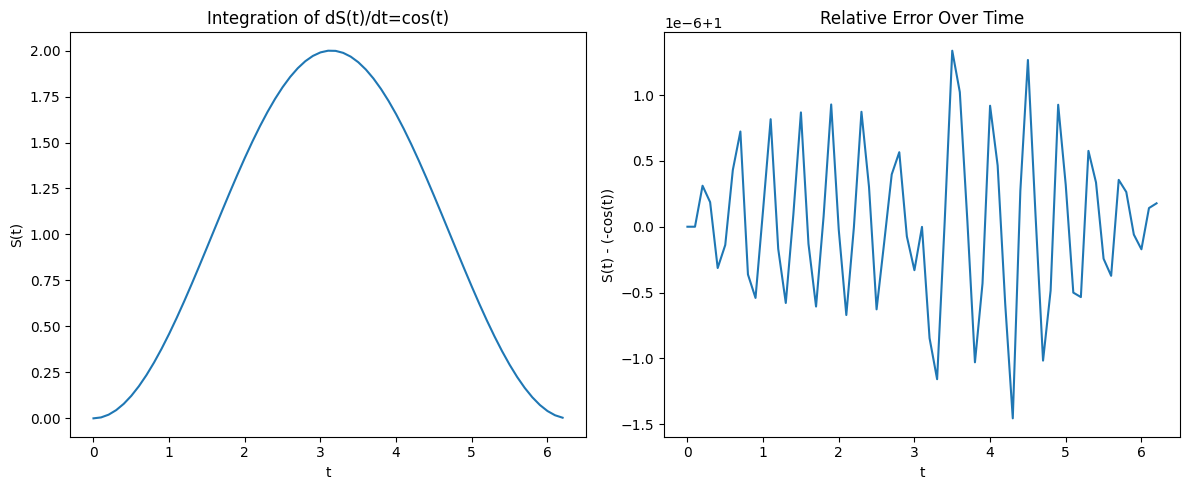

In [39]:
sol = solve_ivp(F, [0, 2*np.pi], [0], t_eval=t_eval, rtol = 1e-7, atol = 1e-7)

plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Integration of dS(t)/dt=cos(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - (-np.cos(sol.t)))
plt.xlabel('t')
plt.ylabel('S(t) - (-cos(t))')
plt.title('Relative Error Over Time')
plt.tight_layout()
plt.show()